# Project 3

## Stirred


## Group 1 9:

- Mussa Banjai
- Tapas Dev
- Jason Kapka
- Taz Ahmed

## Introduction



## Abstract



## Libraries

In [28]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import math as m
import scipy as sp
from scipy import optimize
import pandas as pd

## ODE Solver class

In [29]:
class ODE_Solver:
    def __init__(
                self,
                t,
                dt,
                y,
                tau = 2,
                c0 = 1
                ):
        self.t = t
        self.dt = dt
        self.y = y
        self.tau = tau
        self.c0 = c0

    def f(self):
        return np.exp(-self.t/self.tau)

# Exercises

## Exercise 1

### Part 1

In [30]:
def f(c,t,tau=2):
    n=len(c)
    cinj=0
    rhs=[]
    for i in range(n):
        if i==0:
            rhs.append(cinj-c[0])
        else:
            rhs.append(c[i-1] - c[i])
    return np.array(rhs) * n/tau

def analytical(t,*,c0=[1,0,0],tau=2, n=1):
    if n==1:
        return np.exp(-(t/tau))
    if n==2:
        return ((2*t)/tau) * np.exp(-(2*t/tau))
    if n == 3:
        return ((9*(t**2))/(2*tau**2)) * np.exp(-(3*t/tau))

def f2(y,t,omega):
    Y0,Y1=y
    return np.array([Y1,-omega*omega*Y0])

In [33]:

def rk2(f,y,t,dt,*args,**kwargs):
    k1=dt*f(y,t,*args,**kwargs)
    k2=dt*f(y+k1/2,t+dt/2,*args,**kwargs)
    return k2

def rk4(f,y,t,dt,*args,**kwargs):
    k1=dt*f(y,t,*args,**kwargs)
    k2=dt*f(y+k1/2,t+dt/2,*args,**kwargs)
    k3=dt*f(y+k2/2,t+dt/2,*args,**kwargs)
    k4=dt*f(y+k3,t+dt,*args,**kwargs)
    return (k1+2*k2+2*k3+k4)/6


def ode_solver(f,c0,t0,tf,dt,method,*args,**kwargs):
    c=[]
    #t=[]
    t = np.arange(t0, tf+dt, dt)
    c.append(c0)
    #t.append(t0)
    #ti=t0
    for ti in t:
        #ti=ti+dt
        if method == 'euler':
            step=dt*f(c[-1],ti,*args,**kwargs)
        elif method == 'rk2':
            step=rk2(f,c[-1],ti,dt,*args,**kwargs)
        elif method == 'rk4':
            step= rk4(f,c[-1],ti,dt,*args,**kwargs)
        c.append(c[-1]+step)
        #t.append(ti)
    return np.array(t),np.array(c)

### Part 2

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30. ]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30. ]


ValueError: x and y must have same first dimension, but have shapes (61,) and (62,)

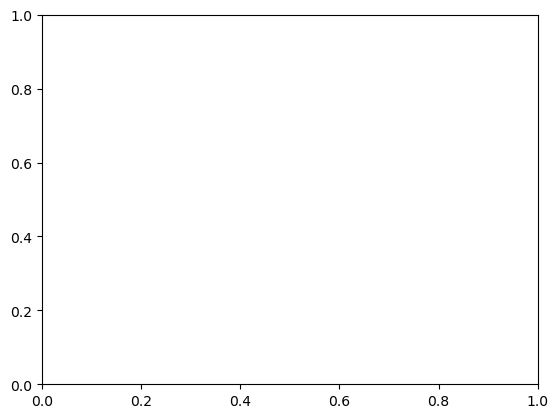

In [34]:
methods=['euler','rk2','rk4']
t0 = 0
tf=30
dt = 0.5
t=np.arange(t0,tf+dt,dt)
tau=2
print(t)
for method in methods:
    tn,cn=ode_solver(f,c0=[1],t0=t0,tf=tf,dt=dt,method=method,tau=tau)
    print(tn)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=1),label='analytical')
plt.grid()
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (61,) and (62,)

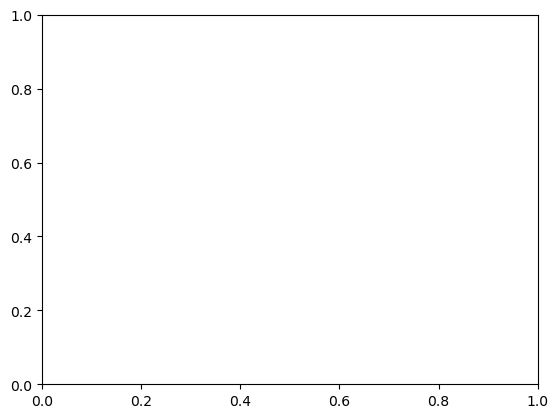

In [ ]:
for method in methods:
    tn,cn=ode_solver(f,c0=[1,0],t0=0,tf=30,dt=.5,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=2),label='analytical')
plt.grid()
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (61,) and (62,)

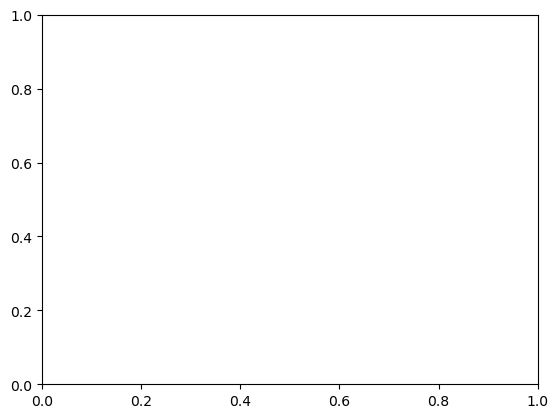

In [ ]:
for method in methods:
    tn,cn=ode_solver(f,c0=[1,0,0],t0=0,tf=30,dt=.5,method=method,tau=tau)
    plt.plot(tn,cn[:, -1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=3),label='analytical')
plt.grid()
plt.legend()

### Part 3

ValueError: x and y must have same first dimension, but have shapes (11,) and (12,)

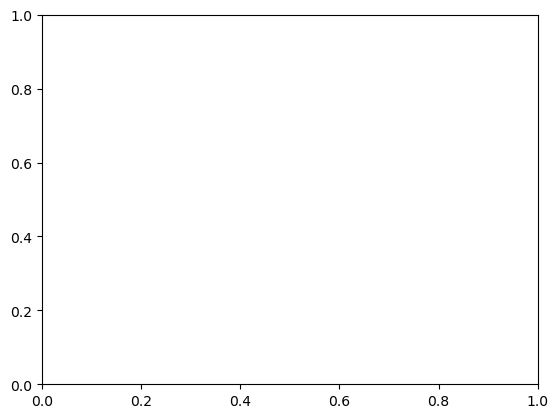

In [ ]:
methods=['euler','rk2','rk4']
tf=1
dt = 0.1
t= np.arange(0, tf+dt, dt)#np.linspace(0,tf,1000)
tau=2
for method in methods:
    tn,cn=ode_solver(f,c0=[1,0,0],t0=0,tf=1,dt=dt,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=3),label='analytical')
plt.grid()
plt.legend()

# Cant be the exact 

## Exercise 2

### Part 1

Data

In [ ]:
healthy_rect_1s = pd.read_csv("data/Healthy_rect_1s.csv", delimiter=",")
concentration = healthy_rect_1s["Concentration"]
time = healthy_rect_1s["Time"]
healthy_rect_1s

,Time,Concentration
0,0.00,0.000000e+00
1,0.02,0.000000e+00
2,0.04,0.000000e+00
3,0.06,0.000000e+00
4,0.08,0.000000e+00
...,...,...
246,4.92,8.620000e-06
247,4.94,4.980000e-06
248,4.96,2.020000e-06
249,4.98,2.510000e-08


Calculation

In [ ]:
Minj = 83.33 # grams
Q =  np.trapz(concentration, x=time)
q = Minj/Q

"""
The solution is in g/sec. Needs to convert to L/min
1 g/s = 0.060 L/min
"""
q = q*0.06
q


5.005803448030458

### Part 2

### Part 3

### Part 5

### **Discussion:**

After solving therotically and logically, we can say that the numerical error scales as expected with respect to the grid size. We compared with different number of nodes. Changing the grid size with a factor of 10, reduces the numerical error with the same factor, for the Lazy numerical Method, as proved theoratically in part 4 of Excercise 1 that we have shown.

However for Not_Lazy method, the error is very low, but it can be seen that it increases as we increase the grid size which is shown in the graph.

## Exercise 2

### Part 1

### Part 2

### Part 3

## Exercise 3: Accuracy and Performance of Time Dependent Solution

### Part 1

#### **Discussion**

When comparing the numerical solution with the line source solution the error reduces by increasing the number of grid points. However, a more notable point was that the total duration also effects the error between the line source and numerical solution, substantially. 

Another observation was that the error increases as we go from the start of the reservoir to the end, for each node size.

### Part 2

In [ ]:

#Input the solver matrix method (dense, sparse and Thomas Algorithm )
#To solve for given solver method

methods = ["d", "s", "t"]
method_names =["Dense", "Sparse", "Thomas Algorithm"]
colors = ["orange", "blue", "green"]
Nodes = 40
total_time = 5
PS3_2 = PressureSolver(Nodes, 0.01, total_time)


# Graph
fig, axs = plt.subplots(1,3, figsize = (14,4))
fig.suptitle("Pressure in reservoir after {} days.".format(total_time))
fig.add_gridspec()

for ax, method, method_name, color in zip(axs, methods, method_names, colors):
    radius, pressure = PS3_2.time_solver(method)
    ax.set_title(f"{method_name} method")
    ax.plot(radius, pressure, f'tab:{color}')
    ax.grid()
    ax.set_xlabel("Reservoir radius (m)")
    ax.set_ylabel("Pressure")

#radius, pressure = PS3_2.time_solver(method)
#m = 'Dense' if method == 'd' else 'Sparse' if method == 's' else 'Thomas_alg'

#PS3_2.plot_graph(radius, pressure, '-', 'Time dependent sol.', 'Reservoir radius (m)', 'Pressure', "Pressure in reservoir after {} days, with {} method.".format(total_time, m))

NameError: name 'PressureSolver' is not defined

In [ ]:
# Solving with different matrix solver methods, to find time for each solver:
m1 = 'd'
m2 = 's'
m3 = 't'
Nodes = 50
total_time = 10
PS3_2_2 = PressureSolver(Nodes, 0.01, total_time)
print("Time to solve with dense matrix for {} nodes and after {} days is: ".format(Nodes, total_time))
%timeit PS3_2_2.time_solver(m1)
print("\n","Time to solve with sparse matrix for {} nodes and after {} days is: ".format(Nodes, total_time))
%timeit PS3_2_2.time_solver(m2)
print("\n", "Time to solve with thomas algorithm for {} nodes and after {} days is: ".format(Nodes, total_time))
%timeit PS3_2_2.time_solver(m3)

Time to solve with dense matrix for 50 nodes and after 10 days is: 
102 ms ± 8.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

 Time to solve with sparse matrix for 50 nodes and after 10 days is: 
480 ms ± 56.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

 Time to solve with thomas algorithm for 50 nodes and after 10 days is: 
226 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### **Discussion**:
The dense matrix is the slowest and the thomas algorithm is the fastest matrix solver method.
These results are noticeable if the node size is 50 or greater

## Exercise 4

### Part 1
<img src="exercises/4a.jpeg" width=500 height=auto auto="Exercise 4 Part 1">

### Part 2

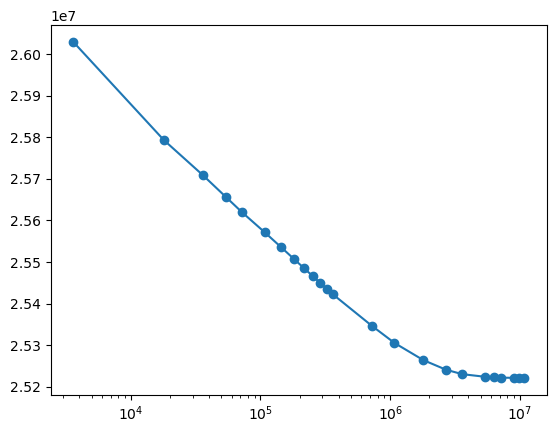

In [ ]:
#Plotting experimental well data

PS4_2 = PressureSolver(4, 0.01, 1)
wd = PS4_2.read_well_data()
plt.plot(wd["time"],wd["well_pressure"],'o-')
plt.xscale('log')

### Part 3

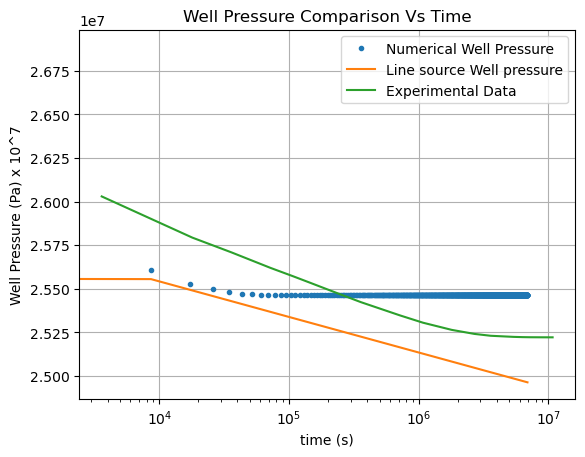

In [ ]:
## initial values of pi, re and k
method = 's'
Nodes = 400
total_time = 80
PS4_3 = PressureSolver(Nodes, 0.1, total_time, pi = 3900, k= 500, re= 1000)
time, pressure, l_pressure= PS4_3.well_pressure()
PS4_3.plot_graph(time, pressure, styl= '.', lbl= "Numerical Well Pressure")
PS4_3.plot_graph(time, l_pressure, lbl= "Line source Well pressure")
PS4_3.plot_graph(wd["time"],wd["well_pressure"], lbl= "Experimental Data", xlabel= 'time (s)', ylabel= 'Well Pressure (Pa) x 10^7', title= 'Well Pressure Comparison Vs Time')
plt.xscale('log')

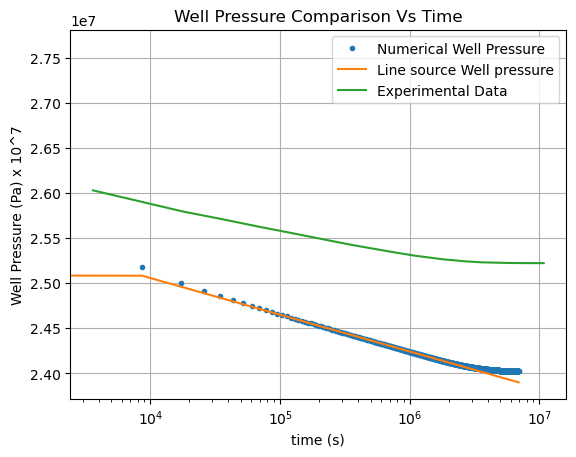

In [ ]:
# After iterations the values of pi, k and re were found to be as shown
PS4_3 = PressureSolver(Nodes, 0.1, total_time, pi = 4007, k= 250, re= 8500)
time, pressure, l_pressure= PS4_3.well_pressure()
PS4_3.plot_graph(time, pressure, styl= '.', lbl= "Numerical Well Pressure")
PS4_3.plot_graph(time, l_pressure, lbl= "Line source Well pressure")
PS4_3.plot_graph(wd["time"],wd["well_pressure"], lbl= "Experimental Data", xlabel= 'time (s)', ylabel= 'Well Pressure (Pa) x 10^7', title= 'Well Pressure Comparison Vs Time')
plt.xscale('log')

#### **Discussion**:

Here, while doing the iterative process various combinations of k, re and pi result in a solution close to experimental data. However, the values we chose were the ones that closely replicated the effect of well pressure getting constant at the end which is more convenient for the project.

In [ ]:
c = PS4_3.curve_fit()
print(c)

[-4.94056806e+00  9.41841446e-15]


### Part 4

In [ ]:
Volume, radius = PS4_3.Volume_of_water()
print('Volume of water based for the reservoir of radius {}m is: {}m^3'.format(radius, Volume))

Volume of water based for the reservoir of radius 2590.8m is: 17675239.448891815m^3


## Reflections

### How did we work?
Basically, we worked on project in the group room, alongside with the lab classes which helped us a lot to discuss about the problems as well as finding the solution. We worked together even if any of us find any solution then we discussed about this and then came to a proper solution which looked like a good way of learning for us. Before finalizing any problem's solution, we together ended up with a good solution and agreed upon that.

Jason created some initial coding and worked on finding the solutions to the problem in theoretical matter. Taz and Tapas worked also on the theorectical matter proofs final Python code. Mussa wrote large sections of Python code and acted as Project Manager by compiling the individual contributions into a final product.


### What we did in the project?
We evaluated the analtical, numerical and line-source solution with two different boundary conditions and also found out the error between them by visuallizing the graphs. Then we matched our well test data from the provided file.

### Our Learnings?
We learnt the implementation of different numerical solvers for the radial deffusivity equation. We also learnt about PressureSolver Class. Besides, we also came across the learning of using two different boundary conditions. Although we did struggle in some stages but this project will help us in near future.future.


## Conclusion

<!-- a simple model is better than complex model-->
We introduced 'class PressureSolver:' which helped us to write the clear and not repeating code which helps us to avoid unavoidable and unwanted errors. With radial differential equation we found out the analytical and numerical solution with Lazy and Not- Lazy bountary conditions, and we concluded that 'not so Lazy' numerical solution is more close to the analytical solution (True Solution) than the 'Lazy' numerical solution.  For time dependence solution, as we increases the time, the difference between line-sourse solution and numerical solution gets larger and vise versa.

The sparse and dense method both gave the same results with a small numerical error. Both of these methods provided a numerical solution similar to the analytical line source solution. For considerale number of nodes, we noticed that, Thomas algorithm takes lesser time as compared to Spare and dense to calculate the numerical solution. 
In conclusion, this project represents a crucial step toward understanding the potential of analysis in determining reservoir size which could be really interesting for further research.

A famous quote from George E. P. Box is "All models are wrong, but some are useful", and this project has proven that in many ways the most insightful model is the one built by yourself (or small group), since you then have the ability to incrementally expand the model's complexity as required to achieve greater accuracy, thereby expanding your own knowledge of the specific phenomena and about modeling in general.

## References

1) Aksel Hiorth. Computational Engineering and Modeling, 2021
   https://github.com/ahiorth/CompEngineering
2) Amin Nemati, Introduction to Well Testing
    https://www.academia.edu/43686719/Introduction_to_well_testing_Analysis_By_Amin_Nematizadeh_Haghighi
3) Drilling Engineering, 2021
    https://www.sciencedirect.com/topics/engineering/diffusivity-equation
4) Patel, Mahesh Chandra, and Aaditya Singh. "Near Wellbore Damage and Types of Skin Depending on Mechanism of Damage.", 2016
    https://onepetro.org/SPEFD/proceedings-abstract/16FD/1-16FD/D012S007R008/187006